In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report
import xgboost as xgb

In [3]:
df = pd.read_csv('Cleaned_Dry_Eye_Dataset.csv')

In [4]:
target_column = 'Dry Eye Disease'
X = df.drop(columns=[target_column])
y = df[target_column]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# XGBoost Default Model

In [10]:
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [11]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6615
Recall: 0.8569236670502494
F1 Score: 0.7674338715218139
ROC AUC: 0.584216358244728

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.30      0.38      1393
           1       0.69      0.86      0.77      2607

    accuracy                           0.66      4000
   macro avg       0.61      0.58      0.57      4000
weighted avg       0.64      0.66      0.63      4000



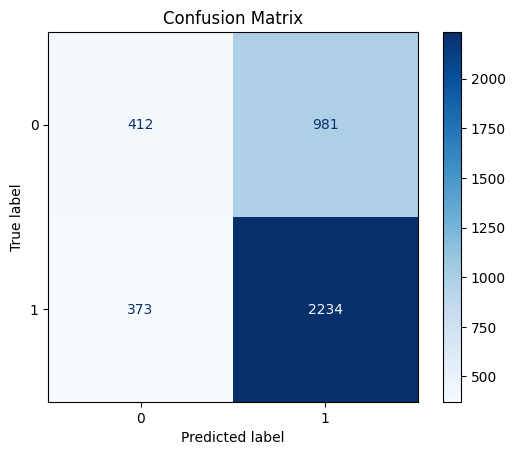

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


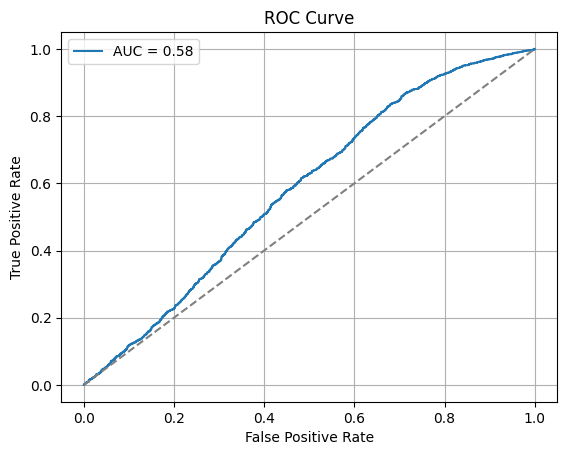

In [14]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


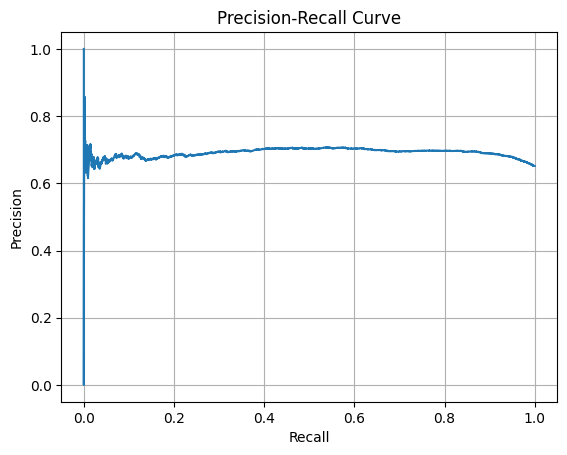

In [15]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


# LightGBM default model

# Improving models

In [ ]:
# handling class imbalance
from collections import Counter
import xgboost as xgb

# 1. Count the distribution in training set
counter = Counter(y_train)
print("Class distribution:", counter)

# 2. Compute scale_pos_weight = #negative / #positive
# Assuming '1' is the positive class (Dry Eye Disease present)
scale_pos_weight = counter[0] / counter[1]
print("scale_pos_weight:", scale_pos_weight)


Class distribution: Counter({1: 10430, 0: 5570})
scale_pos_weight: 0.5340364333652924
